<a href="https://colab.research.google.com/github/SiripakaRakesh/-financial-data-create-a-ML-model-to-predict-if-the-client-is-high-risk-or-low-risk/blob/main/Loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Import Libraries




In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

#Load data

In [50]:
data = pd.read_json('/content/drive/MyDrive/data/loan_approval_dataset.json')

#data exploration

In [51]:
print(data.head())
print(data.info())
print(data.describe())


   Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   

            Profession                 CITY           STATE  CURRENT_JOB_YRS  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh                3   
1   Software_Developer             Parbhani     Maharashtra                9   
2     Technical_writer            Alappuzha          Kerala                4   
3   Software_Developer          Bhubaneswar          Odisha                2   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu                3   

   CURRENT_HOUSE_YRS  Risk_Flag  
0   

#categorical columns

In [52]:
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession',
       'CITY', 'STATE'],
      dtype='object')


# convert catergorical columns to numerical using one-hot encoding

In [54]:
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


#compute the correlation matrix

In [55]:
corr_matrix = data_encoded.corr()

#plot correlation

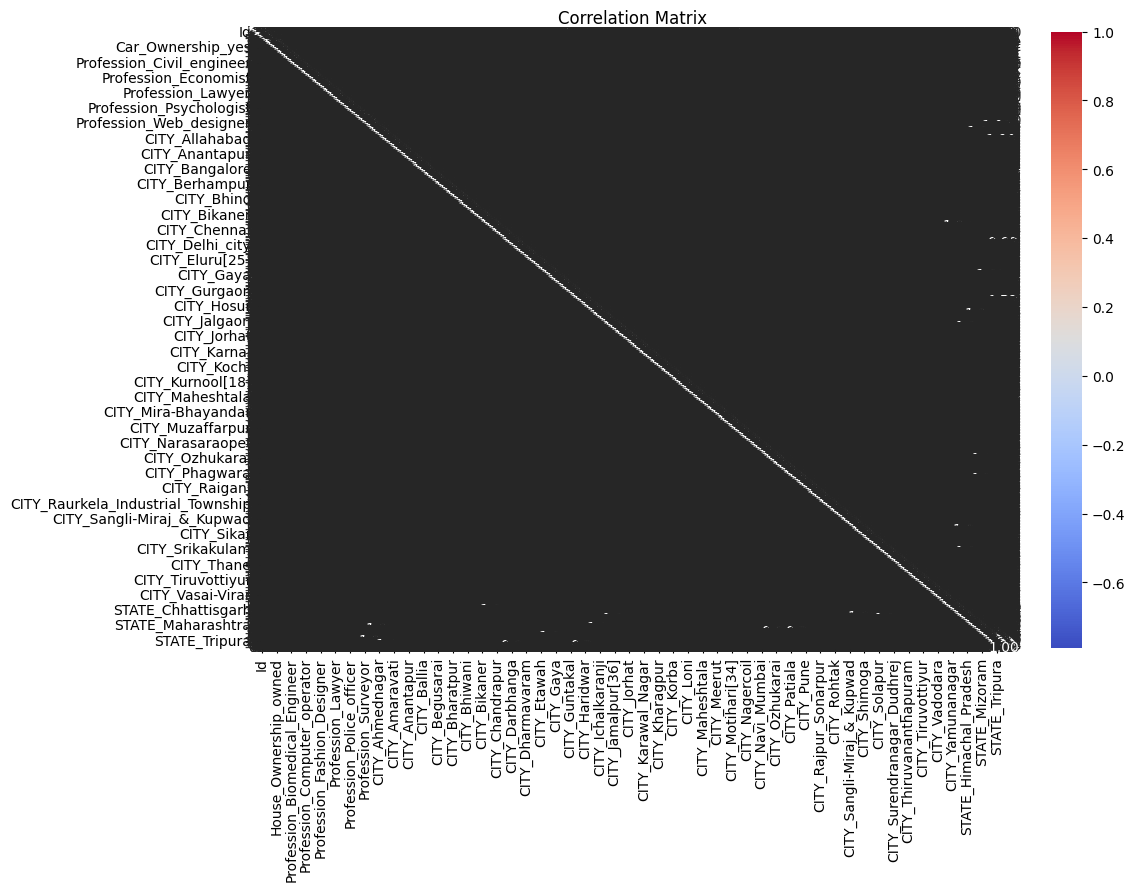

In [56]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#feature section

In [57]:
features = data_encoded.columns.drop('Risk_Flag')
X = data_encoded[features]
y = data_encoded['Risk_Flag']

In [58]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Train the model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:

# Evaluate model performance
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     44147
           1       0.65      0.46      0.54      6253

    accuracy                           0.90     50400
   macro avg       0.79      0.71      0.74     50400
weighted avg       0.89      0.90      0.89     50400

[[42561  1586]
 [ 3370  2883]]


#Generate PDF report

In [61]:
def generate_pdf_report():
    c = canvas.Canvas("loan_risk_report.pdf", pagesize=letter)
    c.drawString(100, 750, "Loan Risk Prediction Report")
    c.drawString(100, 730, "Model Performance:")
    c.drawString(100, 710, "Classification Report:")

    # Add classification report
    report = classification_report(y_test, y_pred)
    lines = report.split('\n')
    for i, line in enumerate(lines):
        c.drawString(100, 690 - i*20, line)

    c.drawString(100, 590, "Confusion Matrix:")
    matrix = confusion_matrix(y_test, y_pred)
    for i, row in enumerate(matrix):
        c.drawString(100, 570 - i*20, str(row))

    c.save()

In [62]:
generate_pdf_report()
